# Monte Carlo Stock Price Predictor

In [1]:
# Import libraries
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
# Read in Adj Close prices from csv
stock_df = pd.read_csv("/Users/bogica/Documents/Fin_Tech/stock-evaluation/Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Adj Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-15    395.115906
2021-03-16    394.617523
2021-03-17    395.963135
2021-03-18    390.201996
2021-03-19    389.480011
Name: Adj Close, dtype: float64

In [4]:
# Calculate stock returns
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2015-03-19   -0.004561
2015-03-20    0.008827
2015-03-23   -0.001949
2015-03-24   -0.005619
2015-03-25   -0.014654
Name: Adj Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

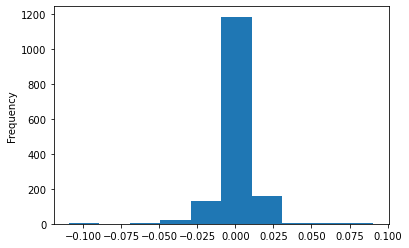

In [5]:
# Plot frequency distribution of returns
returns.plot(kind="hist")

In [6]:
# Calculate mean and standard dev of returns
mean = returns.mean()
std = returns.std()
(mean, std)

(0.0005542495388270051, 0.011585716423659553)

In [7]:
from random import gauss
# Calculate the specific normal distribution of analyzed stock based on its average returns and standard deviation
gauss(mean, std)

-0.007409327217854268

In [8]:
# Read in last stock price
last_val = stock_df.iloc[-1]
last_val

389.4800109863281

In [9]:
# Simulate the next stock value based on probability distribution
last_val * (1+gauss(mean,std))

391.8640183891924

In [9]:
# Simulate stock values for the next 15 days
simvals = [last_val]
days=15

for day in range(days):
    newval = simvals[-1] * (1+gauss(mean,std))
    simvals.append(newval)

simvals

[389.4800109863281,
 389.8980236262276,
 393.65017463374244,
 389.8504118628091,
 394.0658693512573,
 397.3724323646316,
 387.9099549841477,
 389.1728231483556,
 387.9223641565655,
 386.8007533320526,
 372.47018934051016,
 375.06192820713545,
 371.4470465429208,
 374.26142689537204,
 376.3847670558945,
 379.3594977354894]

In [10]:
# Function to simulate stock prices
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        
    return simvals

In [11]:
# Simulate next 15 day stock prices based on the last price
simulate_stocks(15,last_val)

[389.4800109863281,
 393.39472038409224,
 390.6463120291257,
 389.80309412711426,
 388.8403317318068,
 390.9823731208541,
 388.9333846606354,
 400.4476716653756,
 398.8132792754879,
 401.1197924517799,
 401.402638643794,
 407.24649447686147,
 397.40262996254535,
 398.23096224443304,
 398.9240499983487,
 389.18727811603884]

In [12]:
# Simulate stock prices based on 1000 different random scenarios
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [13]:
# Create dataframe of possible stock prices based on 1000 random scenarios
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,389.480011,397.391959,397.192920,398.622429,397.918278,394.878029,397.488636,398.444933,404.671486,398.255633,395.387593,385.083102,384.518706,385.280481,387.170588,384.026648
1,389.480011,376.920633,375.760267,384.043610,389.351564,389.378589,389.727435,388.362829,394.856481,394.594771,396.243090,389.685164,392.792559,394.489682,403.665733,401.561258
2,389.480011,387.278018,386.179639,386.903440,382.782995,386.457521,387.596287,383.552399,385.519099,381.784473,383.670706,377.917877,381.073904,385.782170,390.867137,390.335964
3,389.480011,396.274451,398.171374,397.497097,394.275715,384.476677,382.208719,376.976959,381.798411,379.638699,382.636920,383.490536,392.338468,400.468960,395.670326,399.311418
4,389.480011,383.868517,386.297286,381.548461,373.910768,371.809095,376.190377,382.721305,377.868862,376.115905,371.730967,371.080348,376.626825,383.815817,382.917862,386.518331


In [14]:
# Possible outcomes based on the each of 1000 scenarios (transformed dataframe)
results_df = pd.DataFrame(results).T
results_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
11,385.083102,389.685164,377.917877,383.490536,371.080348,396.662045,377.472138,414.686780,369.864531,347.951444,...,378.376404,387.249189,391.733076,411.122243,405.064059,401.748581,406.698483,387.015375,370.120256,374.913504
12,384.518706,392.792559,381.073904,392.338468,376.626825,396.942874,383.737900,412.431626,371.363672,343.815289,...,374.365200,391.246803,387.967313,411.408093,406.088325,413.466296,415.520848,389.502064,364.538226,375.872069
13,385.280481,394.489682,385.782170,400.468960,383.815817,393.695981,383.579589,408.149194,375.987112,347.435558,...,375.531317,396.085710,394.581091,409.552167,411.964930,404.006889,423.252913,389.231128,363.119543,374.497720
14,387.170588,403.665733,390.867137,395.670326,382.917862,394.533237,385.330353,416.130463,375.402006,348.370870,...,377.141372,398.744594,397.554556,408.552032,408.508790,398.211204,425.968354,390.834554,367.540565,369.610617
15,384.026648,401.561258,390.335964,399.311418,386.518331,390.629385,384.234801,421.401867,371.796813,348.383197,...,378.611301,396.926378,397.491914,410.720688,407.897346,388.327278,418.577227,384.237735,370.362215,367.886550


<AxesSubplot:>

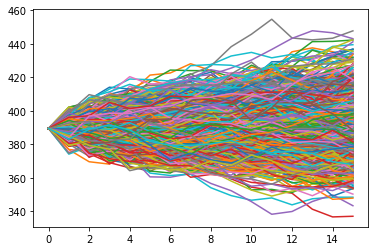

In [15]:
# Plot all possible stock price scenarios
results_df.plot(legend=False)

In [16]:
# Read in the end values (15th day) from the simulation
end_values = results_df.iloc[-1]
end_values.head()

0    384.026648
1    401.561258
2    390.335964
3    399.311418
4    386.518331
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

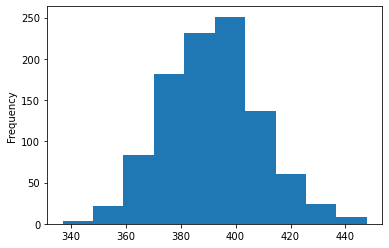

In [17]:
# Plot the probability distribution of end values from the simulation
end_values.plot(kind="hist")

In [18]:
# Calculate the range of possible prices 
end_values.quantile([0.1,0.9])

0.1    369.539921
0.9    413.324298
Name: 15, dtype: float64

In [19]:
# Read in last stock price
last_val

389.4800109863281